In [333]:
#choose dataset +
#choose purpose of analysis  
#create v/env + 
#import libraries
#import dataset

In [334]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [362]:
#connect to DB to import data from table
con = sqlite3.connect("titanic.db")
cur = con.cursor()
tit_df = pd.read_sql('''
    SELECT PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked            
    FROM titan_person''', con)
tit_df.head()

,PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked
0,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
1,892,0,3,"Kelly, Mr. James",male,34.5,7.8292,Q
2,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,7,S
3,894,0,2,"Myles, Mr. Thomas Francis",male,62,9.6875,Q
4,895,0,3,"Wirz, Mr. Albert",male,27,8.6625,S


In [363]:
#delete repeat column (name of columns)
tit_df.drop(index=0,axis = 1, inplace = True)
tit_df.head()

,PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked
1,892,0,3,"Kelly, Mr. James",male,34.5,7.8292,Q
2,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,7,S
3,894,0,2,"Myles, Mr. Thomas Francis",male,62,9.6875,Q
4,895,0,3,"Wirz, Mr. Albert",male,27,8.6625,S
5,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,12.2875,S


In [364]:
tit_df.columns

Index(['PassengerId', 'Survived', 'PClass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

In [365]:
#correct indecies
tit_df = tit_df.reset_index()
tit_df.head()


,index,PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked
0,1,892,0,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,2,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,7,S
2,3,894,0,2,"Myles, Mr. Thomas Francis",male,62,9.6875,Q
3,4,895,0,3,"Wirz, Mr. Albert",male,27,8.6625,S
4,5,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,12.2875,S


In [366]:
tit_df.drop('index', axis = 1, inplace = True)
tit_df.head()

,PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,7,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,12.2875,S


In [375]:
# change type of el's in columns Age,Fare
# change (age,fare) el's from '' to NaN 
tit_df['Age'] = tit_df['Age'].replace('',np.nan)
tit_df['Fare'] = tit_df['Fare'].replace('',np.nan)

In [376]:
#change type of columns
tit_df.info()
print('===================================================')
convert_dict = {'PassengerId': int,
                'Survived': int,
                'PClass': int,
                'Age':float,
                'Fare':float
                }
tit_df = tit_df.astype(convert_dict)
print(tit_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int32  
 1   Survived     417 non-null    int32  
 2   PClass       417 non-null    int32  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int32(3), object(3)
memory usage: 24.4+ KB
PassengerId      int32
Survived         int32
PClass           int32
Name            object
Sex             object
Age            float64
Fare           float64
Embarked        object
dtype: object


In [377]:
# replace NaN to age.mean / and drop Fare el's
mean_age = round(tit_df[tit_df['Age'] != '']['Age'].mean())
tit_df['Age'] = tit_df['Age'].fillna(mean_age)
tit_df= tit_df.dropna()

In [383]:
tit_df.to_csv('EDA_tit.csv')

In [388]:
path = r'EDA_tit.csv'
titanic_df = pd.read_csv(path)
titanic_df = titanic_df.drop('Unnamed: 0',axis=1)
titanic_df.head()

,PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S


In [393]:
titanic_df.shape

(417, 8)

In [394]:
titanic_df.describe()

,PassengerId,Survived,PClass,Age,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.143885,35.627188
std,120.923774,0.481870,0.842077,12.562546,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,512.329200


In [395]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   PClass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [561]:
#qestions for vizualization
# -- how many pass of each class was on the ship
# -- what is max/min/av age of pass
# -- what is max/min/av age of pass for each class
# -- how many male/female wa on ship
# -- how many male/female of each class was on the ship
# -- what percent of surv from male / female
# -- what precent of surv from each class
# -- how many pass of each emb place was on the ship

In [397]:
# -- how many pass of each class was on the ship

In [416]:
pClass_pass = titanic_df['PClass'].value_counts().sort_index()


In [421]:
titanic_df.head()

,PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S


# -- how many pass of each class was on the ship

In [548]:
titanic_df['PClass'].value_counts().sort_index()

PClass
1    107
2     93
3    217
Name: count, dtype: int64

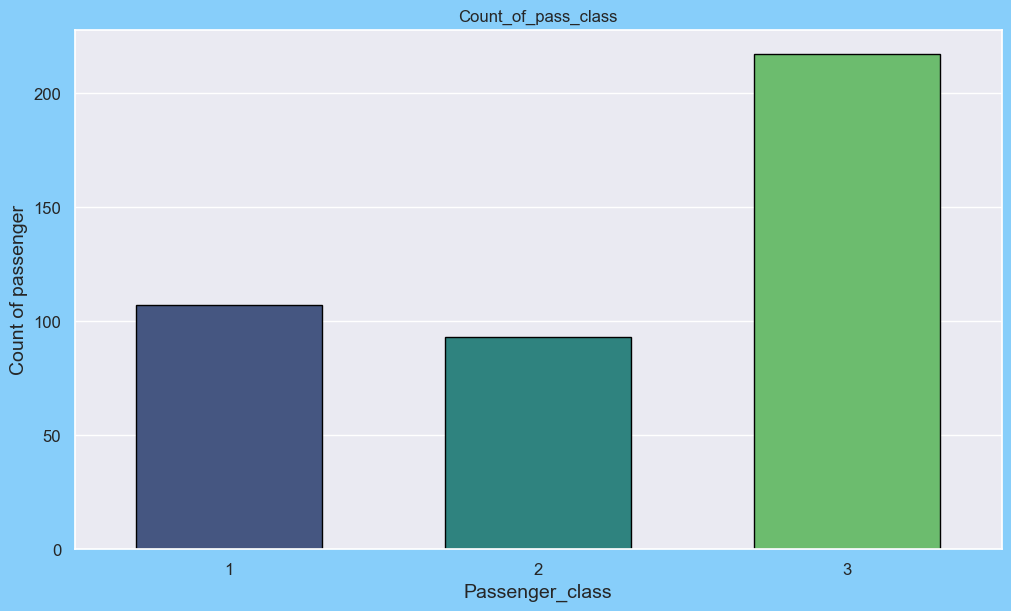

In [546]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.countplot(titanic_df,x='PClass',palette = 'viridis',width=0.6,edgecolor = 'black')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Count_of_pass_class', loc='center', fontsize='medium')
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.ylabel('Count of passenger', size=14)
plt.show()


# -- what is max/min/av age of pass

In [551]:
titanic_df['Age'].min()

0.17

In [552]:
titanic_df['Age'].max()

76.0

In [553]:
titanic_df['Age'].mean()

30.14388489208633

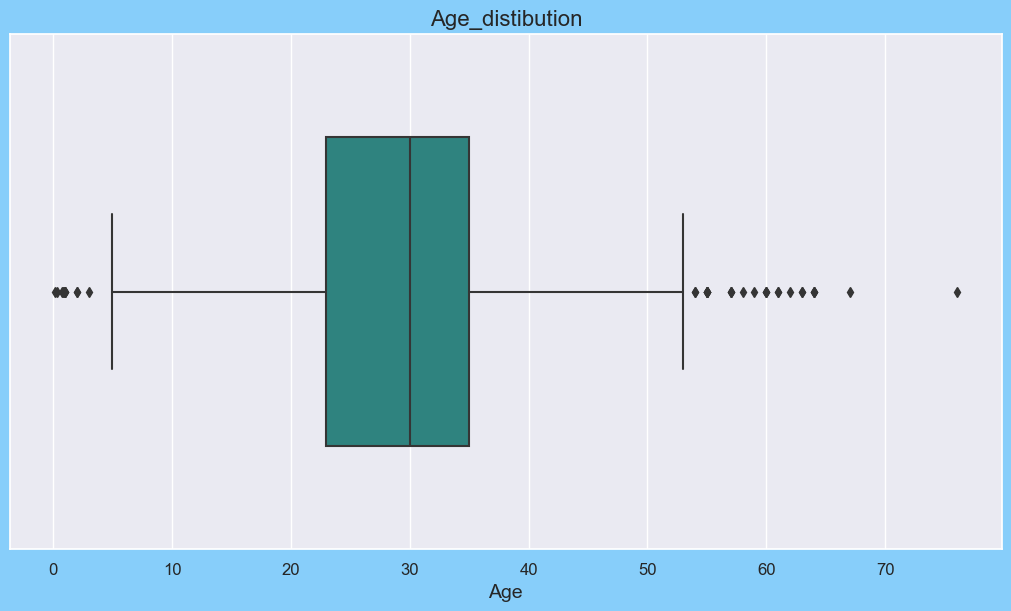

In [559]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.boxplot(titanic_df,x='Age',palette = 'viridis',width=0.6)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Age', size=14)
plt.yticks(size=12)
plt.show()

# -- what is max/min/av age of pass for each class

In [598]:
titanic_df.groupby(by='PClass')['Age'].min()

PClass
1    6.00
2    0.92
3    0.17
Name: Age, dtype: float64

In [599]:
titanic_df.groupby(by='PClass')['Age'].max()

PClass
1    76.0
2    63.0
3    50.0
Name: Age, dtype: float64

In [600]:
titanic_df.groupby(by='PClass')['Age'].mean()

PClass
1    40.000000
2    28.843226
3    25.841382
Name: Age, dtype: float64

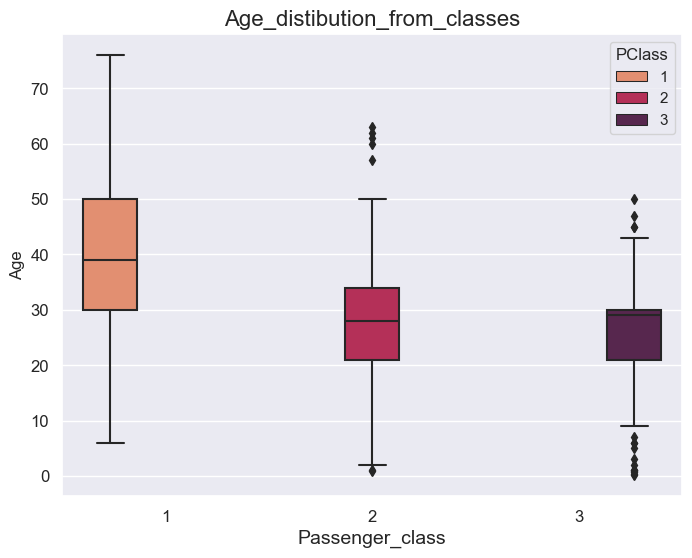

In [597]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(titanic_df,x='PClass',y='Age',hue='PClass',palette = 'rocket_r')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution_from_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.show()

# -- how many male/female was on ship

In [601]:
titanic_df['Sex'].value_counts()

Sex
male      265
female    152
Name: count, dtype: int64

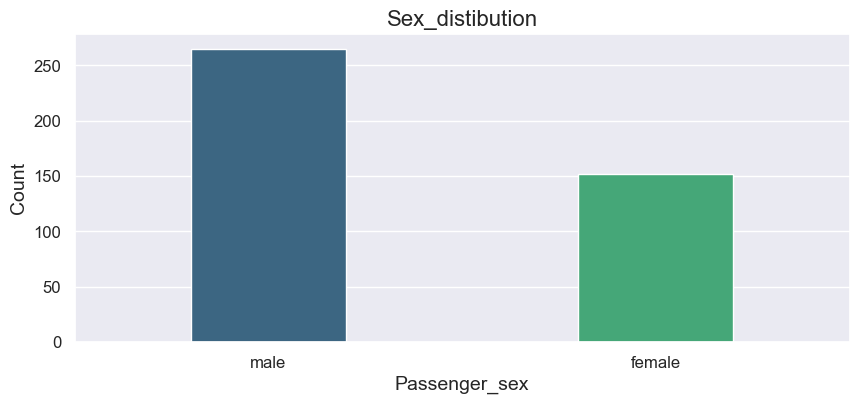

In [614]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='Sex',palette = 'viridis',width=0.4)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_sex', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- how many male/female of each class was on the ship

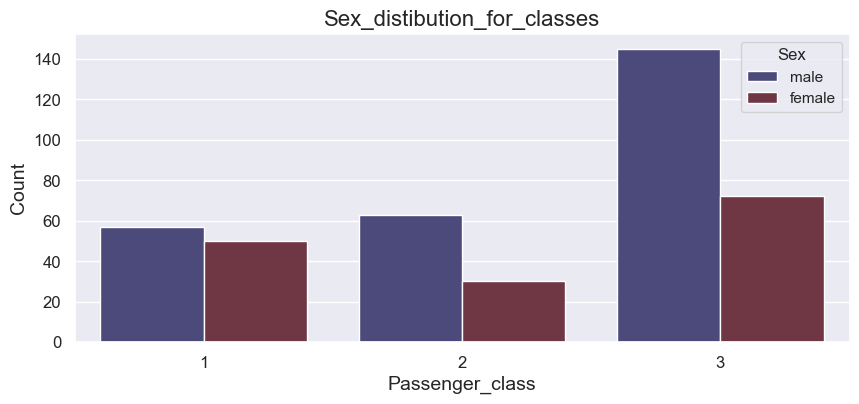

In [628]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='PClass',hue='Sex',palette = 'icefire')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what percent of surv from male / female

In [665]:
titanic_df['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
412    0
413    1
414    0
415    0
416    0
Name: Survived, Length: 417, dtype: int64

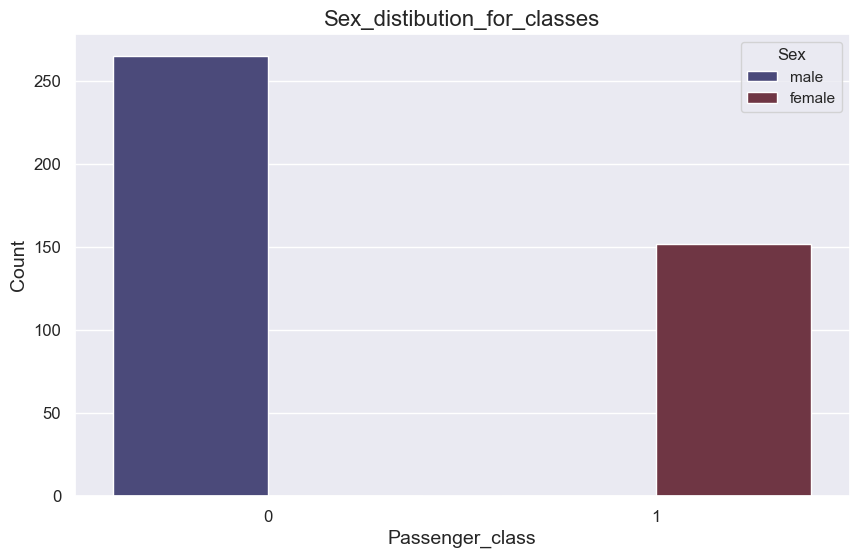

In [660]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(titanic_df,x='Survived',hue='Sex',palette = 'icefire')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what precent of surv from each class

AttributeError: 'numpy.int64' object has no attribute 'startswith'

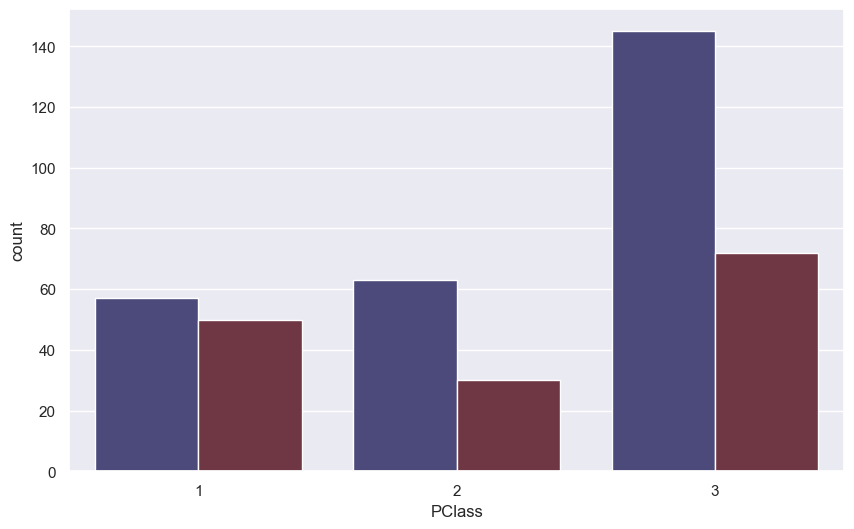

In [664]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(titanic_df,x='PClass',hue='Survived',palette = 'icefire')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()